In [2]:
import random
import cv2
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import os

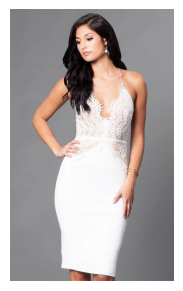

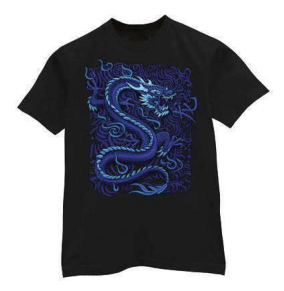

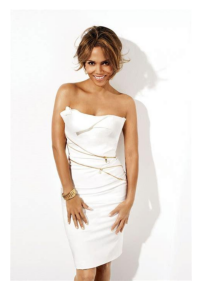

In [3]:
image_path=glob('dress_color dataset/train/**/*')
for i in range(3):
    image=random.choice(image_path)
    img=cv2.imread(image)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [4]:
image_count_train=len(glob('dress_color dataset//train/**/*'))
image_count_train

11385

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
img_Size=48
batch_size=32
Datagen_train=ImageDataGenerator(horizontal_flip=True,rescale=1./255,zoom_range=0.3,
                                   validation_split=0.2,
                                   rotation_range=10,
                                   width_shift_range= 0.1,
                                   height_shift_range= 0.1,
                                   shear_range= 0.2 )
        


train_generator=Datagen_train.flow_from_directory('dress_color dataset/train/',
                                                  target_size=(img_Size,img_Size),
                                                  batch_size=batch_size ,
                                                  color_mode='grayscale',
                                                  shuffle=True,
                                                  class_mode='categorical',
                                                  subset='training'
                                                 )

Found 9115 images belonging to 24 classes.


In [7]:
Datagen_test=ImageDataGenerator(rescale=1./255,validation_split=0.2)

validation_generator=Datagen_test.flow_from_directory('dress_color dataset/train/',
                                                     target_size=(img_Size,img_Size),
                                                     batch_size=batch_size,
                                                     color_mode='grayscale',
                                                     class_mode='categorical',
                                                     shuffle=True,
                                                    subset='validation'
                                                     )

Found 2270 images belonging to 24 classes.


In [8]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Input,BatchNormalization,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


In [9]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [10]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [11]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(24, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [12]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,313,432 (5.01 MB)

 Trainable params: 1,312,472 (5.01 MB)

 Non-trainable params: 960 (3.75 KB)

In [13]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("dresscolor_model.weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

In [14]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15


C:\Users\Welcome\anaconda3\envs\emotion_detection_courses\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3029 - loss: 2.3832
Epoch 1: saving model to dresscolor_model.weights.h5
284/284 ━━━━━━━━━━━━━━━━━━━━ 546s 2s/step - accuracy: 0.3031 - loss: 2.3822 - val_accuracy: 0.2277 - val_loss: 3.4857
Epoch 2/15
  1/284 ━━━━━━━━━━━━━━━━━━━━ 2:55 620ms/step - accuracy: 0.4375 - loss: 1.7875

C:\Users\Welcome\anaconda3\envs\emotion_detection_courses\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: saving model to dresscolor_model.weights.h5
284/284 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4375 - loss: 1.7875 - val_accuracy: 0.2333 - val_loss: 3.5883
Epoch 3/15
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4484 - loss: 1.7117
Epoch 3: saving model to dresscolor_model.weights.h5
284/284 ━━━━━━━━━━━━━━━━━━━━ 473s 2s/step - accuracy: 0.4485 - loss: 1.7116 - val_accuracy: 0.4594 - val_loss: 1.5879
Epoch 4/15
  1/284 ━━━━━━━━━━━━━━━━━━━━ 2:15 478ms/step - accuracy: 0.4375 - loss: 1.7249
Epoch 4: saving model to dresscolor_model.weights.h5
284/284 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4375 - loss: 1.7249 - val_accuracy: 0.4333 - val_loss: 1.6634
Epoch 5/15
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4833 - loss: 1.5852
Epoch 5: saving model to dresscolor_model.weights.h5
284/284 ━━━━━━━━━━━━━━━━━━━━ 493s 2s/step - accuracy: 0.4833 - loss: 1.5852 - val_accuracy: 0.4960 - val_loss: 1.5424
Epoch 6/15
  1/284 ━━━━━━━━━━━━━━━━━━━━ 1:37 344ms/step -

In [15]:
model.evaluate(validation_generator)

71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 333ms/step - accuracy: 0.5522 - loss: 1.3469


[1.3641778230667114, 0.5325990915298462]

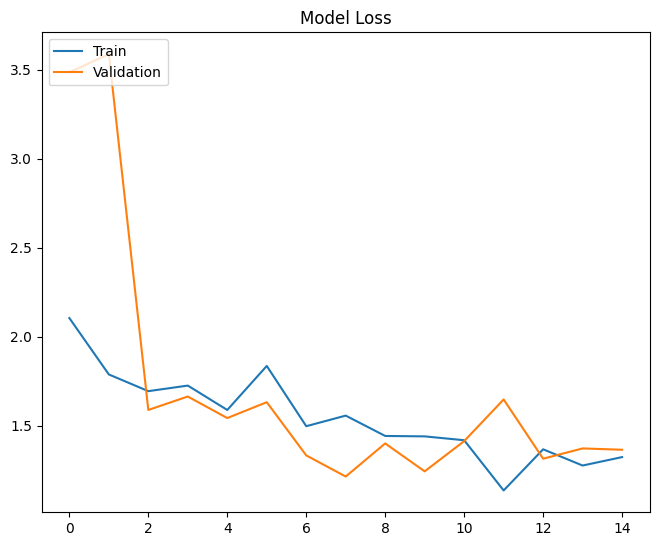

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

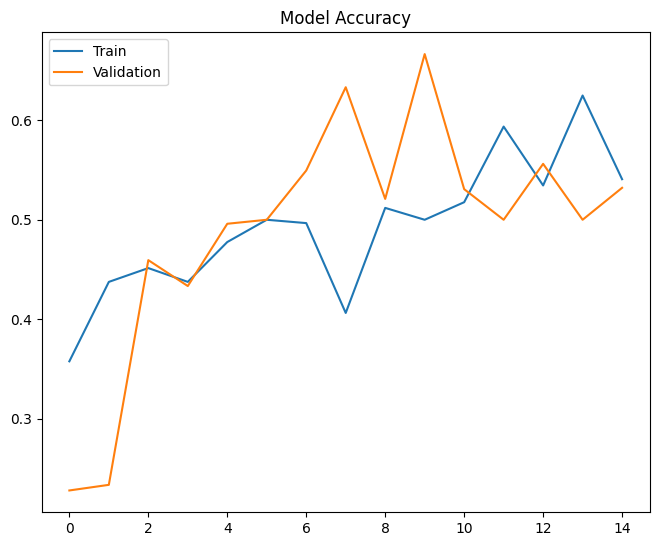

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [18]:
model_json = model.to_json()
with open("dresscolor_model.json","w") as json_file:
    json_file.write(model_json)